In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
nfl = pd.read_csv('season_2021.csv')
nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


In [5]:
result_encoder = {'result': {'W': 1, 'T': 0, 'L': 0}}
nfl.replace(result_encoder, inplace=True)
nfl['result'].value_counts()

0    286
1    284
Name: result, dtype: int64

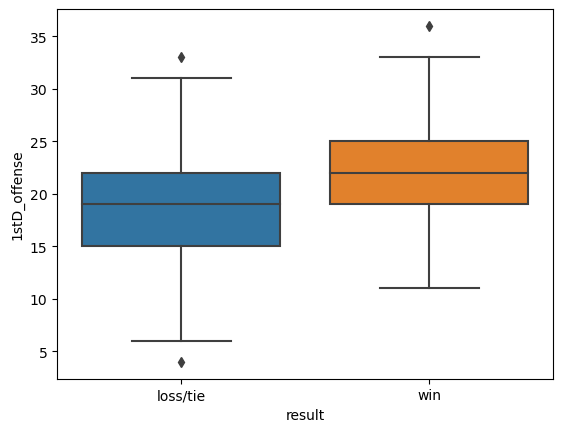

Index(['1stD_offense', 'TotYd_offense', 'PassY_offense', 'RushY_offense',
       'TO_offense', '1stD_defense', 'TotYd_defense', 'PassY_defense',
       'RushY_defense', 'TO_defense'],
      dtype='object')


In [6]:
stat = '1stD_offense'

stat_plot = sns.boxplot(x='result', y=stat, data=nfl)

stat_plot.set_xticklabels(['loss/tie','win'])
plt.show()

print(nfl.columns[8:])

In [7]:
features = nfl.iloc[:,8:]
scaler = StandardScaler()

scaler.fit(features)

X = scaler.transform(features)

In [8]:
y = nfl['result']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [10]:
lrc = LogisticRegression()

lrc.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = lrc.predict(X_test)

accuracy_score(y_test, y_pred)

0.8280701754385965

In [12]:
penalties = ['l1', 'l2']
C = [0.01, 0.1, 1.0, 10.0, 1000.0]

for penalty in penalties:
    for c in C:

        lrc_tuned = LogisticRegression(penalty=penalty, C=c, solver='liblinear')

        lrc_tuned.fit(X_train, y_train)
        
        y_pred = lrc_tuned.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rd = round(accuracy*100,1)
        
        print(f'Accuracy: {accuracy_rd}% | penalty = {penalty}, C = {c}')

Accuracy: 52.3% | penalty = l1, C = 0.01
Accuracy: 84.6% | penalty = l1, C = 0.1
Accuracy: 83.2% | penalty = l1, C = 1.0
Accuracy: 82.5% | penalty = l1, C = 10.0
Accuracy: 82.5% | penalty = l1, C = 1000.0
Accuracy: 80.4% | penalty = l2, C = 0.01
Accuracy: 83.5% | penalty = l2, C = 0.1
Accuracy: 82.8% | penalty = l2, C = 1.0
Accuracy: 82.5% | penalty = l2, C = 10.0
Accuracy: 82.5% | penalty = l2, C = 1000.0


In [13]:
penalty = 'l1'
C = 0.1

test_sizes = [val/100 for val in range(20,36)]

for test_size in test_sizes:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    lrc_tts = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

    lrc_tts.fit(X_train, y_train)

    y_pred = lrc_tts.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rd = round(accuracy*100,1)
    
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')

Accuracy: 87.7% | test size = 0.2
Accuracy: 87.5% | test size = 0.21
Accuracy: 87.3% | test size = 0.22
Accuracy: 87.9% | test size = 0.23
Accuracy: 88.3% | test size = 0.24
Accuracy: 88.8% | test size = 0.25
Accuracy: 87.9% | test size = 0.26
Accuracy: 88.3% | test size = 0.27
Accuracy: 88.1% | test size = 0.28
Accuracy: 88.6% | test size = 0.29
Accuracy: 87.1% | test size = 0.3
Accuracy: 87.6% | test size = 0.31
Accuracy: 86.9% | test size = 0.32
Accuracy: 87.3% | test size = 0.33
Accuracy: 86.1% | test size = 0.34
Accuracy: 86.0% | test size = 0.35


In [14]:
test_size = 0.25
penalty = 'l1'
C = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

optLr = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

optLr.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

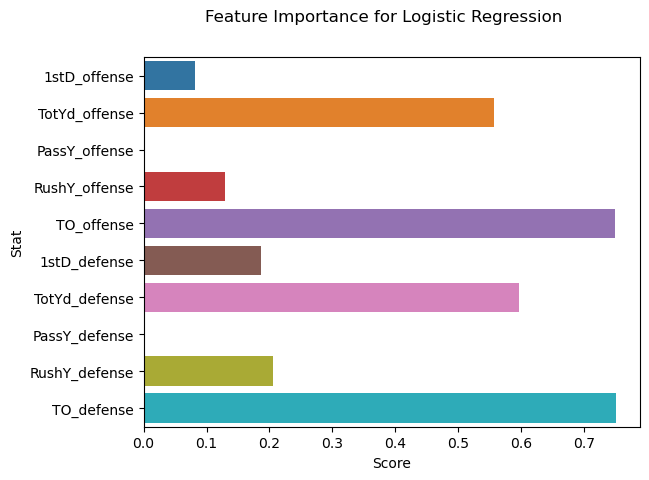

Feature: 1stD_offense, Score: 0.08
Feature: TotYd_offense, Score: 0.56
Feature: PassY_offense, Score: 0.0
Feature: RushY_offense, Score: 0.13
Feature: TO_offense, Score: 0.75
Feature: 1stD_defense, Score: 0.19
Feature: TotYd_defense, Score: 0.6
Feature: PassY_defense, Score: 0.0
Feature: RushY_defense, Score: 0.21
Feature: TO_defense, Score: 0.75


In [15]:
importance = abs(optLr.coef_[0])

sns.barplot(x=importance, y=features.columns)

plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()


for i,v in enumerate(importance.round(2)):
    print(f'Feature: {features.columns[i]}, Score: {v}')

In [22]:
team = 'Atlanta Falcons'
year = 2021

from helper import get_new_data
new_data = get_new_data(team=team, year=year)

new_data.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Atlanta Falcons,1,Sun,September 12,0,Philadelphia Eagles,6,32,19,260,136,124,0,24,434,261,173,0
1,Atlanta Falcons,2,Sun,September 19,0,Tampa Bay Buccaneers,25,48,19,348,293,55,3,21,341,259,82,1
2,Atlanta Falcons,3,Sun,September 26,1,New York Giants,17,14,18,296,227,69,1,21,346,246,100,1
3,Atlanta Falcons,4,Sun,October 3,0,Washington Football Team,30,34,24,374,275,99,0,26,412,290,122,0
4,Atlanta Falcons,5,Sun,October 10,1,New York Jets,27,20,28,450,342,108,2,17,230,166,64,1


In [23]:
new_X = new_data.loc[:,features.columns]

new_X_sc = scaler.transform(new_X)

In [24]:
new_preds = optLr.predict(new_X_sc)

new_results = new_data['result'].astype(float)

acc_score = accuracy_score(new_results, new_preds)

In [25]:
col_names = ['day', 'date', 'result', 'opponent', 'tm_score', 'opp_score']
game_data = new_data.loc[:,col_names]

comp_table = game_data.assign(predicted = new_preds,
                              actual = new_results.astype(int))

In [26]:
print(f'Predicted Wins vs Actual Wins for {team} in {year}')
comp_table

Predicted Wins vs Actual Wins for Atlanta Falcons in 2021


,day,date,result,opponent,tm_score,opp_score,predicted,actual
0,Sun,September 12,0,Philadelphia Eagles,6,32,0,0
1,Sun,September 19,0,Tampa Bay Buccaneers,25,48,0,0
2,Sun,September 26,1,New York Giants,17,14,0,1
3,Sun,October 3,0,Washington Football Team,30,34,0,0
4,Sun,October 10,1,New York Jets,27,20,1,1
5,Sun,October 24,1,Miami Dolphins,30,28,0,1
6,Sun,October 31,0,Carolina Panthers,13,19,0,0
7,Sun,November 7,1,New Orleans Saints,27,25,1,1
8,Sun,November 14,0,Dallas Cowboys,3,43,0,0
9,Thu,November 18,0,New England Patriots,0,25,0,0


In [27]:
print(f'\nCurrent Accuracy Score: ' + str(round(acc_score*100,1)) + '%')


Current Accuracy Score: 82.4%
